Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def create_neighbors_table(L):
    neighbor_table = np.empty((4, L, L), dtype=tuple)

    for i in range(L):
        for j in range(L):
            bottom_neighbor = ((i + 1) % L, j)
            top_neighbor = ((i - 1) % L, j)
            right_neighbor = (i, (j + 1) % L)
            left_neighbor = (i, (j - 1) % L)

            neighbor_table[0, i, j] = bottom_neighbor
            neighbor_table[1, i, j] = top_neighbor
            neighbor_table[2, i, j] = right_neighbor
            neighbor_table[3, i, j] = left_neighbor

    return neighbor_table

In [3]:
def calculate_lattice_energy(spins, L, J, neighbors_table):
    energy = 0.0  # Total energy
    
    for i in range(L):
        for j in range(L):
            theta = spins[i, j]
            
            bottom_neighbor = neighbors_table[0, i, j]
            top_neighbor = neighbors_table[1, i, j]
            right_neighbor = neighbors_table[2, i, j]
            left_neighbor = neighbors_table[3, i, j]

            theta_bottom = spins[bottom_neighbor]
            theta_top = spins[top_neighbor]
            theta_right = spins[right_neighbor]
            theta_left = spins[left_neighbor]

            energy -= J * (
                np.cos(theta - theta_right) +
                np.cos(theta - theta_left) +
                np.cos(theta - theta_bottom) +
                np.cos(theta - theta_top)
            )

    return energy / 2

In [4]:
def init_spins(L):
    return (np.random.rand(L, L) - 0.5) * 2 * np.pi

def get_local_energy(spin, neighbors, J):
    return -J * sum(np.cos(spin - neighbor) for neighbor in neighbors)

def monte_carlo_step(spins, L, T, J):
    neighbors_table = create_neighbors_table(L)
    
    for _ in range(L**2):
        i, j = np.random.randint(0, L, 2)  # Select a random spin
        
        neighbors = [
            spins[neighbors_table[0][i][j]],
            spins[neighbors_table[1][i][j]],
            spins[neighbors_table[2][i][j]],
            spins[neighbors_table[3][i][j]]
        ]

        init_energy = get_local_energy(spins[i, j], neighbors, J)
    
        d_theta = np.random.uniform(-np.pi, np.pi)
        
        new_angle = spins[i, j] + d_theta
        new_angle = (new_angle + np.pi) % (2 * np.pi) - np.pi

        new_energy = get_local_energy(new_angle, neighbors, J)
        
        d_energy = new_energy - init_energy
        
        if d_energy < 0 or np.random.uniform(0.0, 1.0) < np.exp(-d_energy / T):
            spins[i, j] = new_angle
        
    return spins
            
def run_simulation(L, T, n_steps, J=1, save=False, energy=False, i=0):
    spins = init_spins(L)
    neighbors_table = create_neighbors_table(L)
    energies = []
    
    initial_energy = calculate_lattice_energy(spins, L, J, neighbors_table)
    energies.append(initial_energy)
    
    for step in range(n_steps):
        spins = monte_carlo_step(spins, L, T, J)
        
        if energy:
            energy = calculate_lattice_energy(spins, L, J, neighbors_table)
            energies.append(energy)
        
        if save:
            path_name = f"C:/Users/hmpor/Jupyter Notebooks/Thesis/short_results_{L}x{L}/{i}/{L}/{T}/{step}.txt"
            os.makedirs(os.path.dirname(path_name), exist_ok=True)
            np.savetxt(path_name, spins)
    
    if energy:
        plt.figure(figsize=(12,4))
        plt.plot(energies)
        plt.title(f"XY Spin Model Energy at T={T}")
        plt.xlabel("Monte Carlo step")
        plt.ylabel("Lattice energy")
        plt.savefig(f"energy_{T}_2.png")
        plt.show()
        
    return spins, energies

def show_lattice(spins, T, filename="lattice.png"):
    plt.figure(figsize=(6, 6))
    plt.imshow(spins, cmap='twilight', interpolation='nearest')
    plt.colorbar(label='Spin Angle')
    plt.title(f'XY Spin Model at T={T}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(filename)
    plt.show()
    
def show_results(magnetization, heat, n_steps):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(range(n_steps), magnetizations, color='blue')
    plt.title('Magnetization over Time')
    plt.xlabel('Steps')
    plt.ylabel('Magnetization')

    plt.subplot(2, 1, 2)
    specific_heats.append(calculate_specific_heat(np.array(energies), T))
    plt.plot(range(n_steps), specific_heats, color='red')
    plt.title('Specific Heat over Time')
    plt.xlabel('Steps')
    plt.ylabel('Specific Heat')

    plt.tight_layout()
    plt.show()

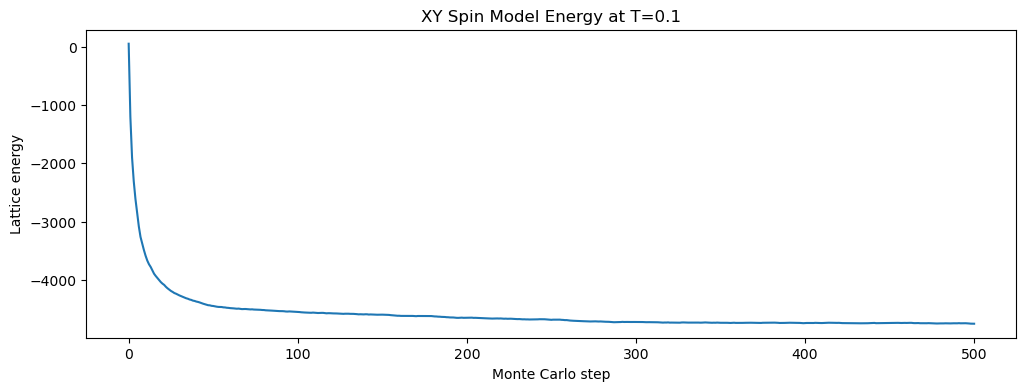

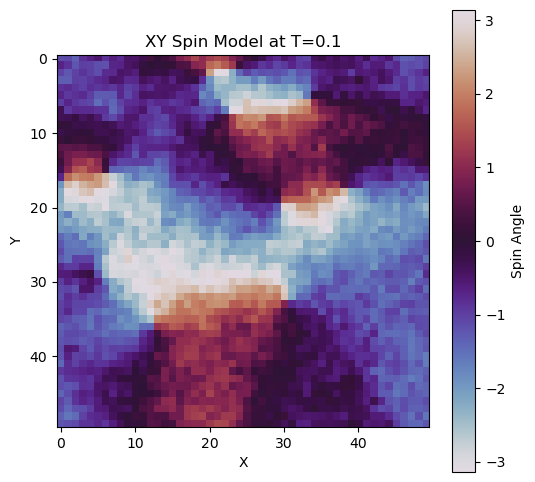

In [40]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 500  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

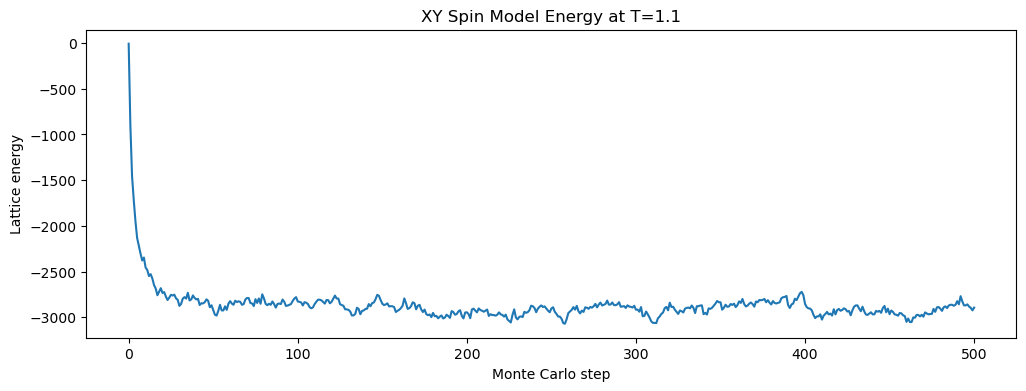

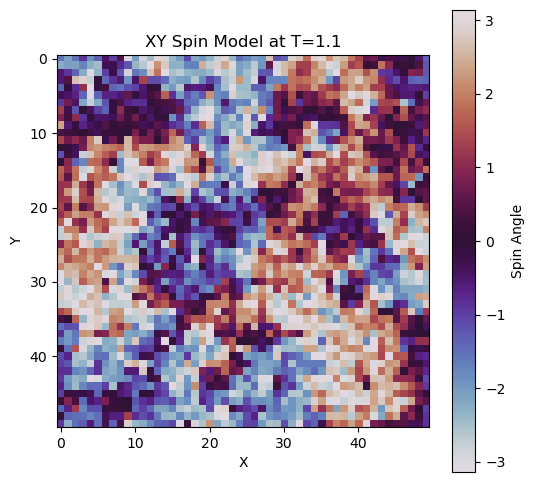

In [41]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 1.1  # Temperature
n_steps = 500  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "1_1.png")

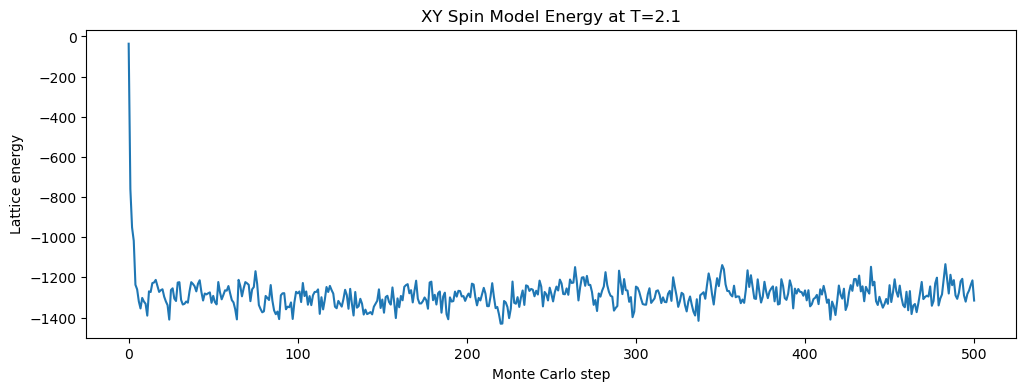

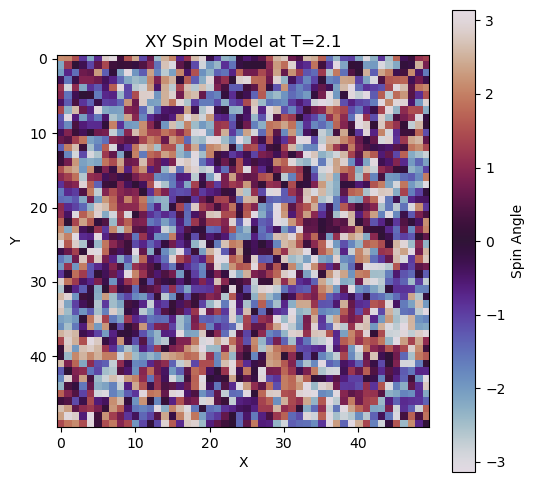

In [42]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 2.1  # Temperature
n_steps = 500  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "2_1.png")

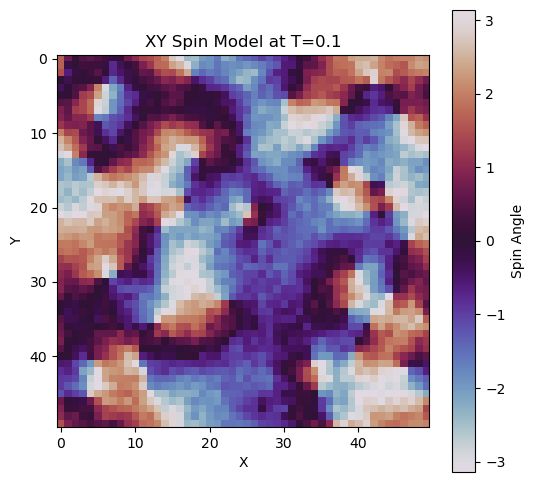

In [9]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps)
show_lattice(result, T, "0_1.png")

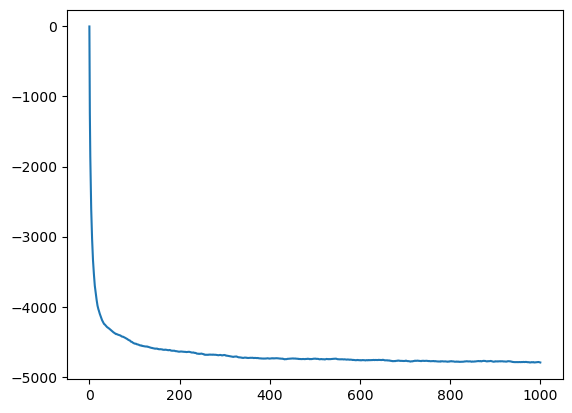

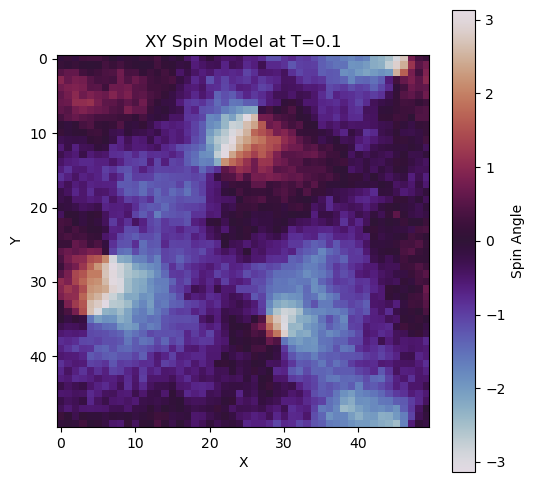

In [7]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

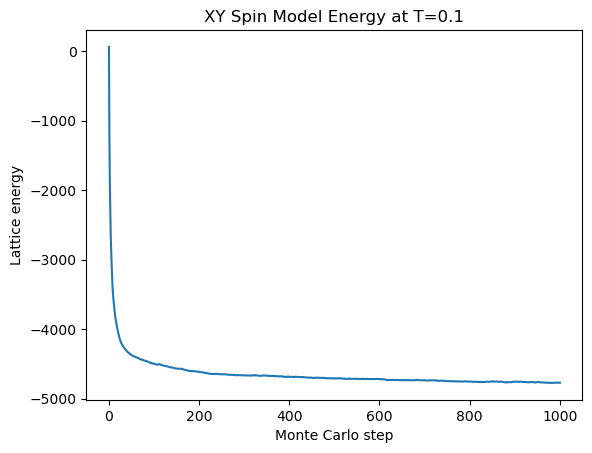

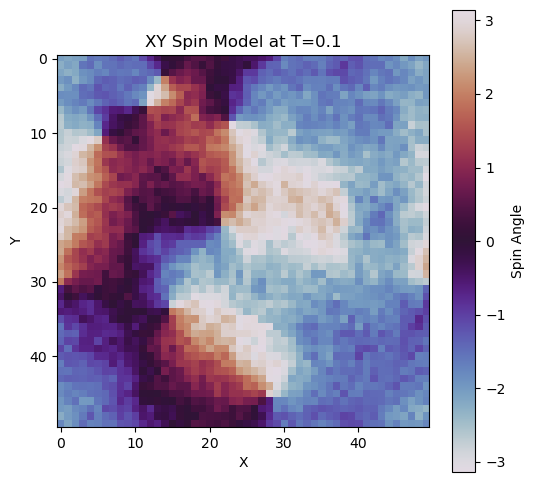

In [17]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

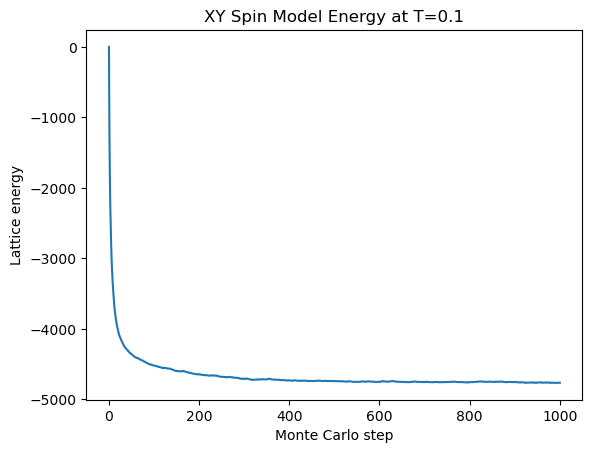

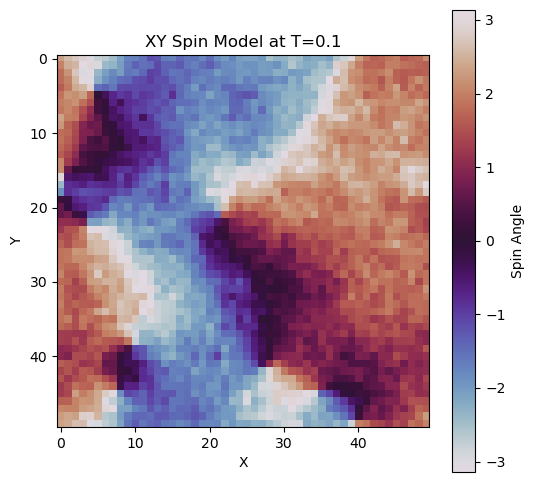

In [16]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

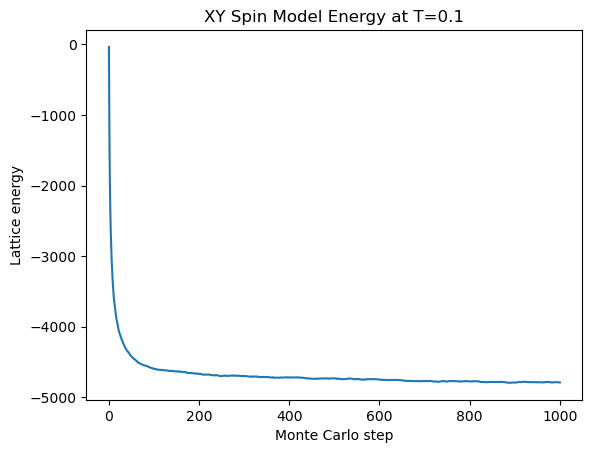

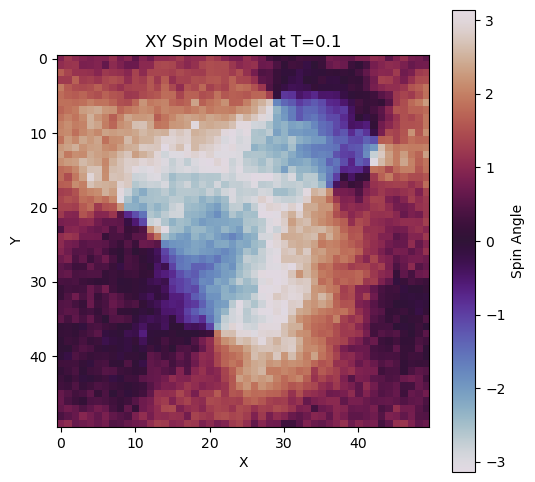

In [18]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

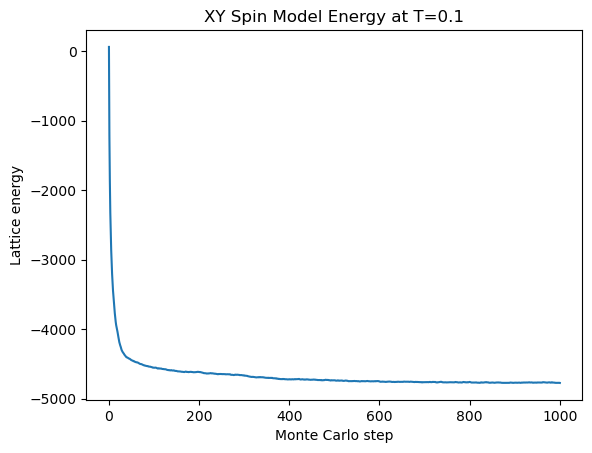

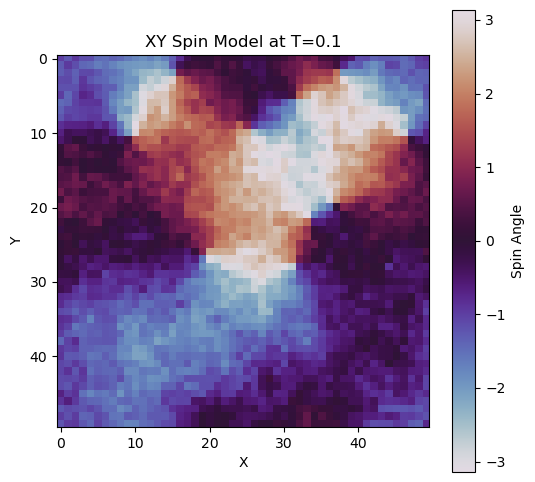

In [19]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

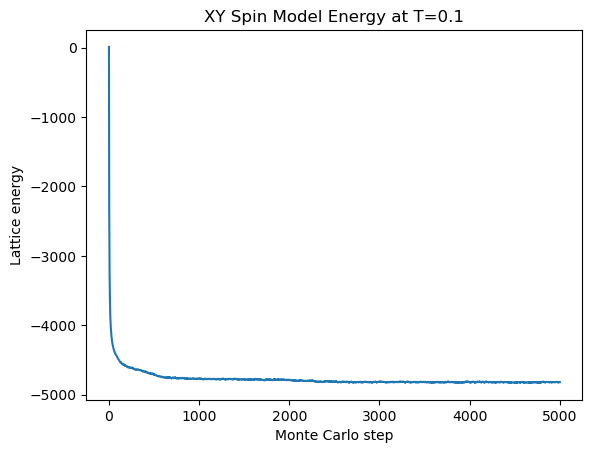

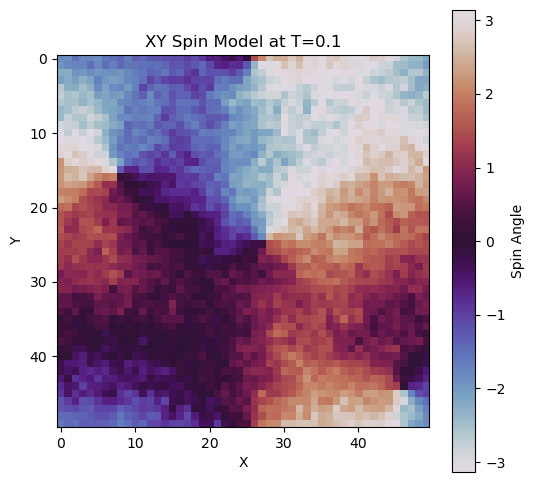

In [20]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 5000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "0_1.png")

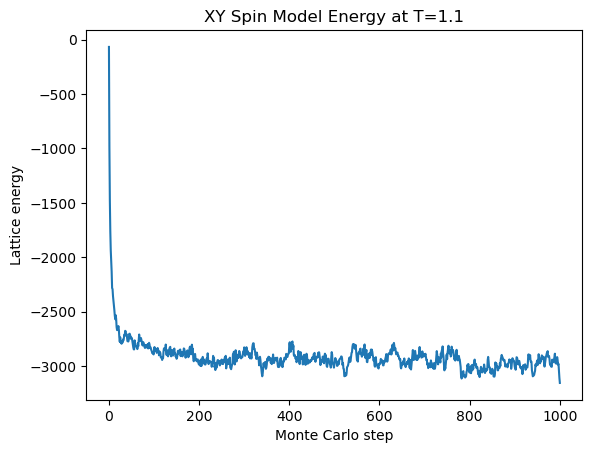

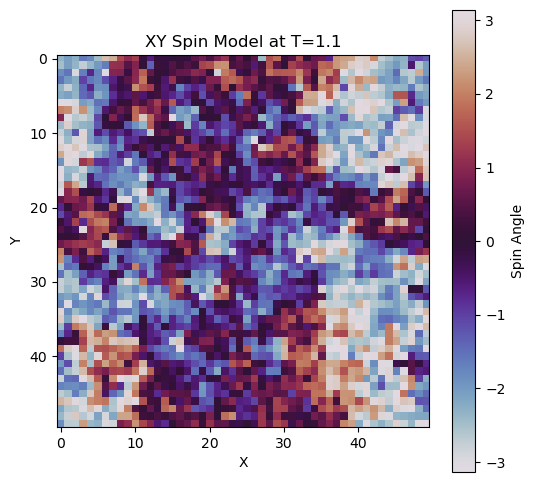

In [14]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 1.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "1_1.png")

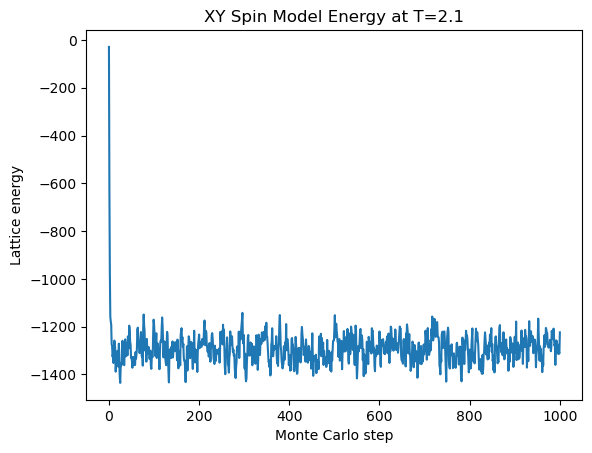

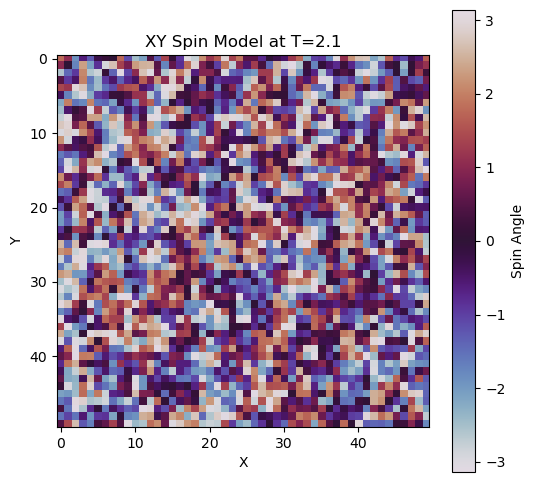

In [15]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 2.1  # Temperature
n_steps = 1000  # Number of Monte Carlo steps

result, energies = run_simulation(L, T, n_steps, energy=True)
show_lattice(result, T, "2_1.png")

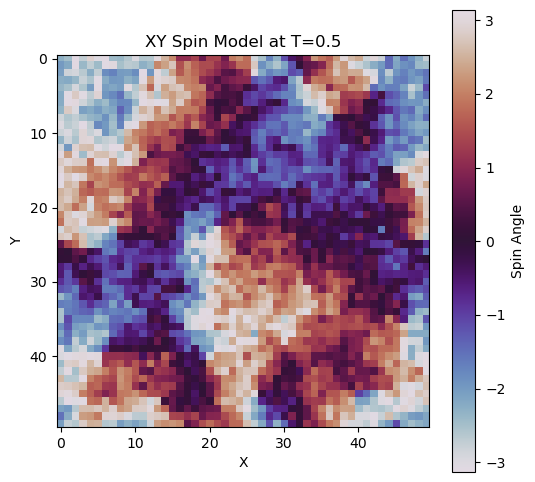

In [10]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.5  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps)
show_lattice(result, T, "0_5.png")

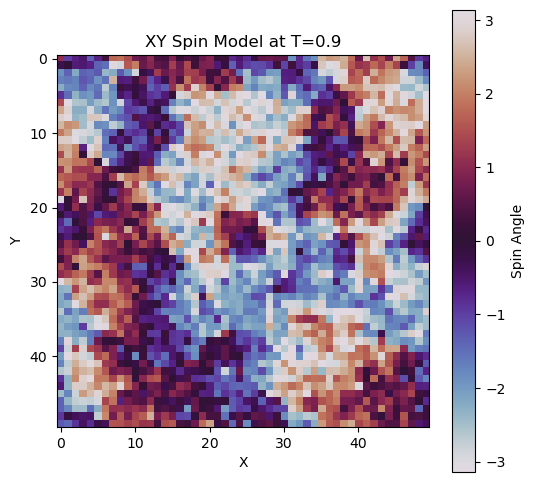

In [11]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 0.9  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps)
show_lattice(result, T, "0_9.png")

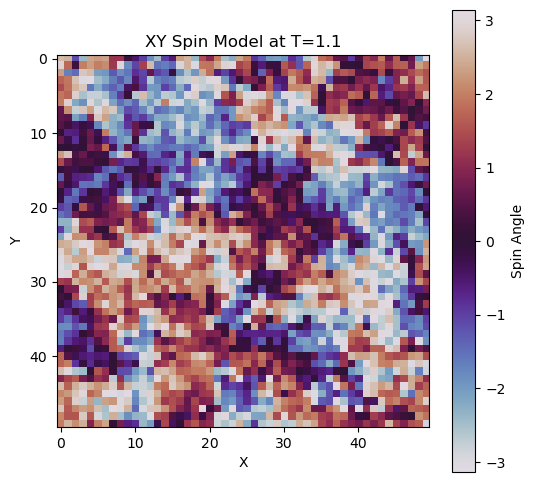

In [12]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 1.1  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps)
show_lattice(result, T, "1_1.png")

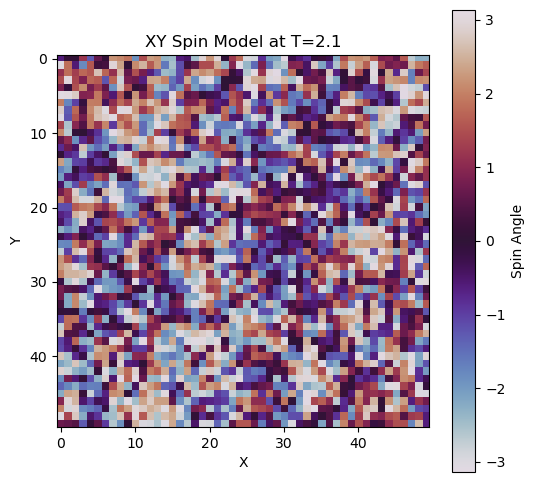

In [13]:
# Parameters
L = 50  # Lattice size
J = 1.0  # Coupling constant
T = 2.1  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps)
show_lattice(result, T, "2_1.png")

In [5]:
temperatures = np.arange(0.1, 1.2, 0.1)
lattice_sizes = [8]
J = 1.0
n_steps = 50000

for lat_size in lattice_sizes:
    for temp in temperatures:
        result = run_simulation(lat_size, temp, n_steps, save=True)

In [4]:
temperatures = np.arange(0.1, 1.2, 0.1)
print(temperatures)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


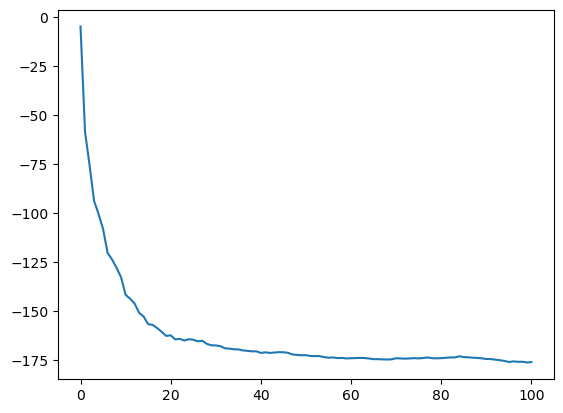

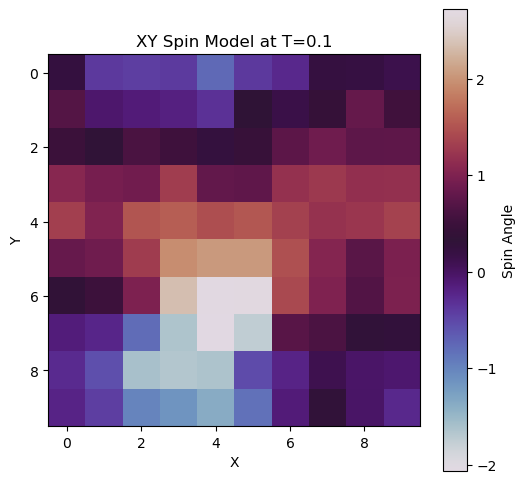

In [12]:
# Parameters
L = 10  # Lattice size
J = 1.0  # Coupling constant
T = 0.1  # Temperature
n_steps = 100  # Number of Monte Carlo steps

result = run_simulation(L, T, n_steps, energy=True)
show_lattice(result)

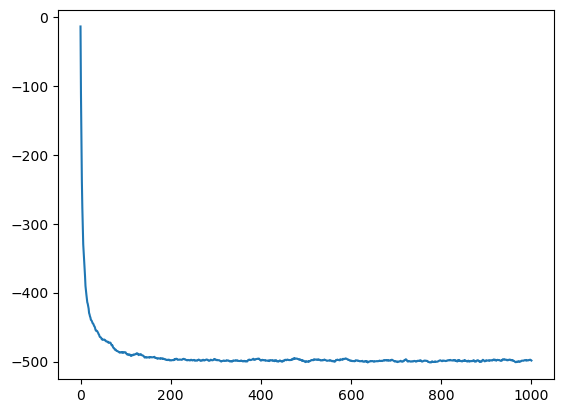

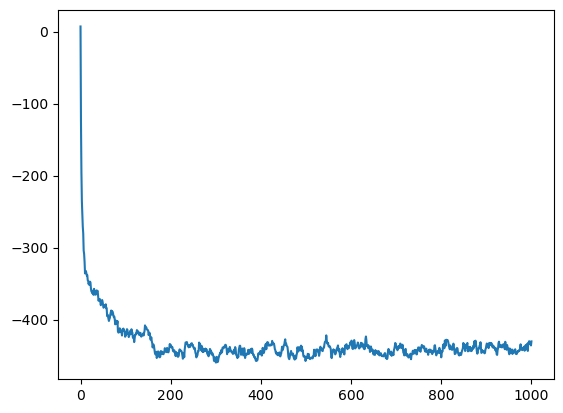

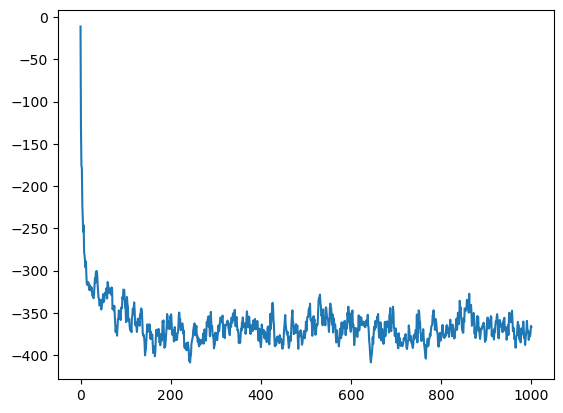

In [14]:
# temperatures = np.arange(0.1, 1.2, 0.1)
temperatures = [0.1, 0.5, 0.9]

lattice_sizes = [16]
J = 1.0
n_steps = 1000

for i in range(1):
    for lat_size in lattice_sizes:
        for temp in temperatures:
            result = run_simulation(lat_size, temp, n_steps, save=False, i=i, energy=True)

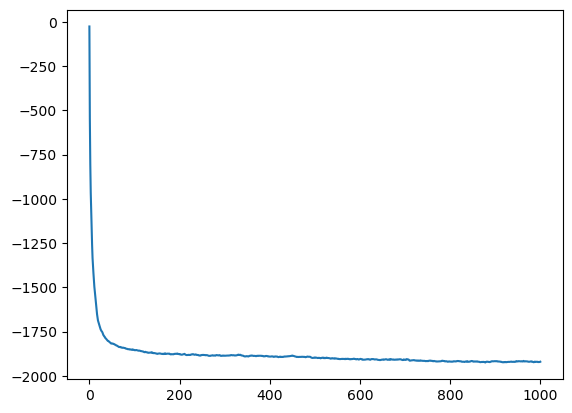

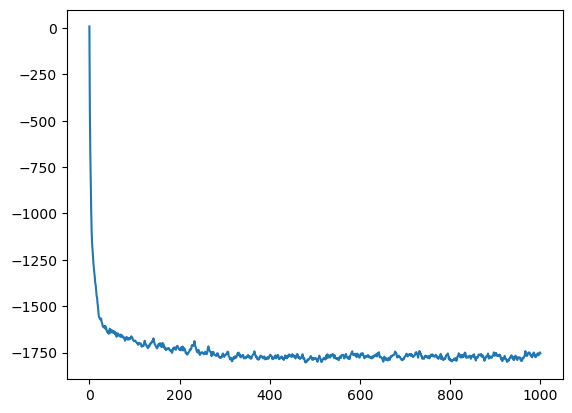

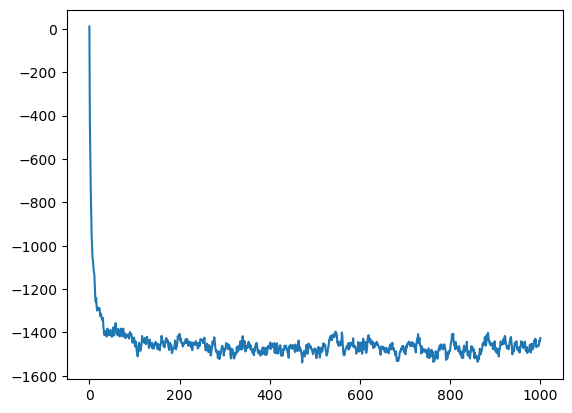

In [18]:
# temperatures = np.arange(0.1, 1.2, 0.1)
temperatures = [0.1, 0.5, 0.9]

lattice_sizes = [32]
J = 1.0
n_steps = 1000

for i in range(1):
    for lat_size in lattice_sizes:
        for temp in temperatures:
            result = run_simulation(lat_size, temp, n_steps, save=False, i=i, energy=True)

In [5]:
# temperatures = np.arange(0.1, 1.2, 0.1)
temperatures = [0.1, 0.5, 0.9]
lattice_sizes = [8, 16, 32]
J = 1.0
n_steps = 500

for i in range(200):
    for lat_size in lattice_sizes:
        for temp in temperatures:
            result = run_simulation(lat_size, temp, n_steps, save=True, i=i)

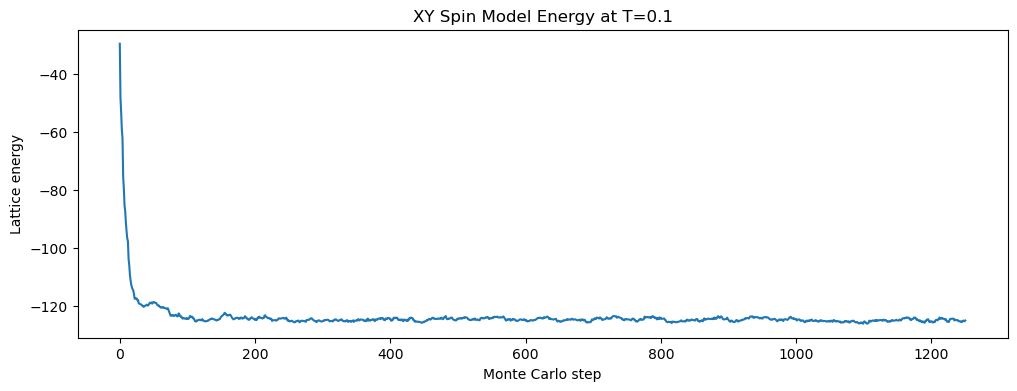

IndexError: index 5 is out of bounds for axis 0 with size 5

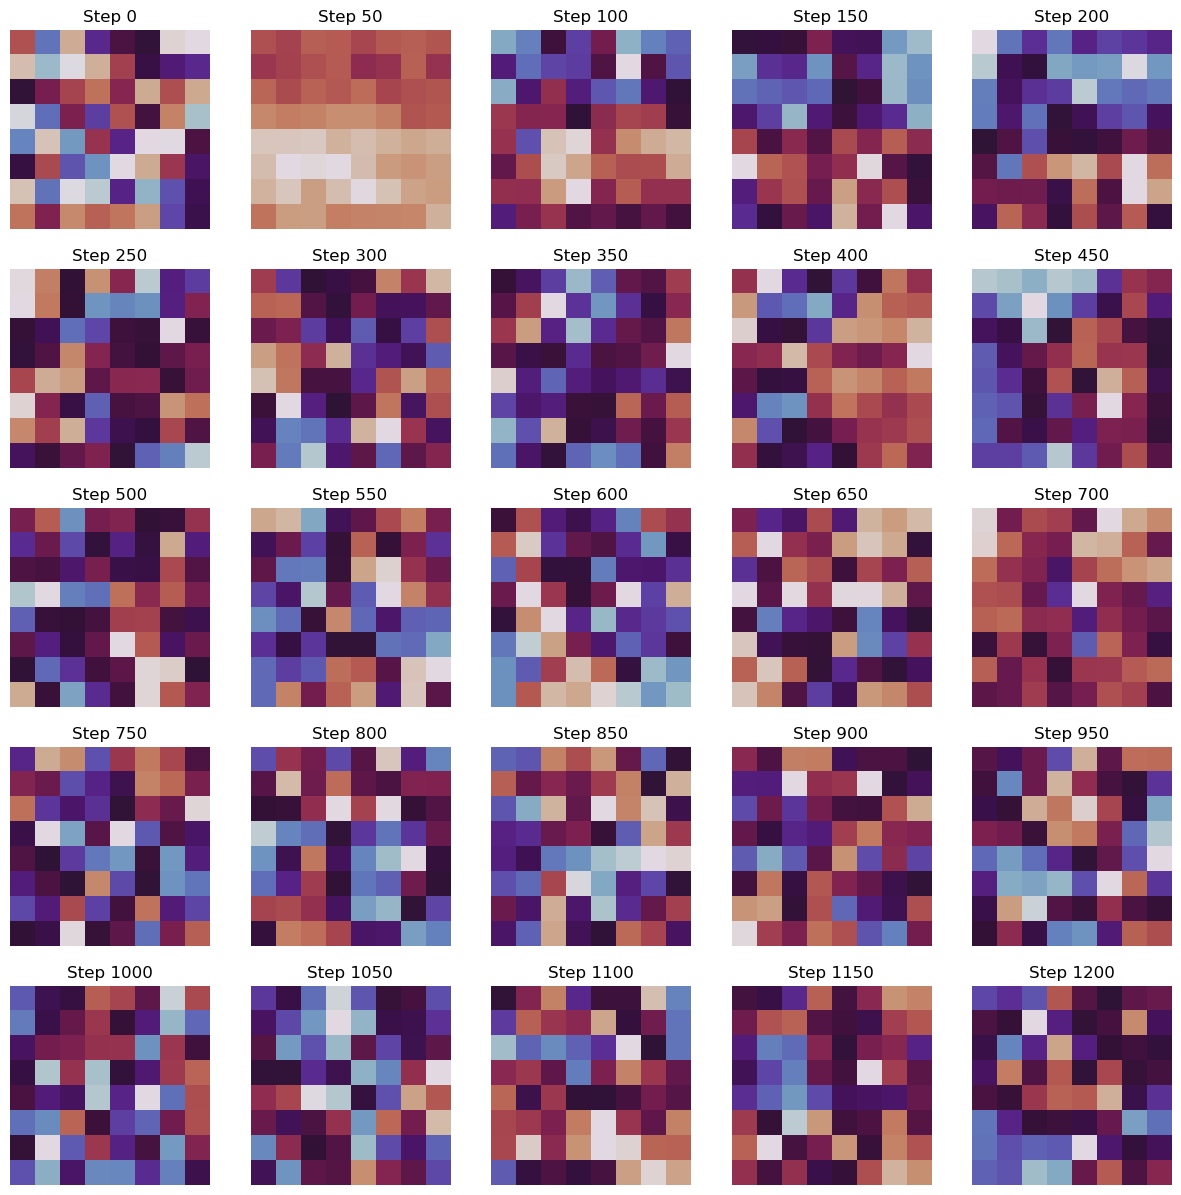

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing functions: init_spins, get_local_energy, monte_carlo_step, calculate_lattice_energy)

def run_simulation_with_snapshots(L, T, n_steps, J=1, snapshot_interval=100):
    spins = init_spins(L)
    neighbors_table = create_neighbors_table(L)
    energies = []
    snapshots = []

    for step in range(n_steps + 1):  # Include initial configuration
        if step % snapshot_interval == 0:
            snapshots.append(spins.copy())  # Store a copy of the lattice

        spins = monte_carlo_step(spins, L, T, J)
        energy = calculate_lattice_energy(spins, L, J, neighbors_table)
        energies.append(energy)

    plt.figure(figsize=(12,4))
    plt.plot(energies)
    plt.title(f"XY Spin Model Energy at T={T}")
    plt.xlabel("Monte Carlo step")
    plt.ylabel("Lattice energy")
    plt.savefig(f"energy_{T}_{L}_snapshot.png")
    plt.show()
    
    return snapshots, energies

def plot_lattice_snapshots(snapshots, T, title, snapshot_interval):
    fig, axs = plt.subplots(5, 5, figsize=(15, 15))
    
    for i, snapshot in enumerate(snapshots):
        row = i // 5
        col = i % 5
        axs[row, col].imshow(snapshot, cmap='twilight', interpolation='nearest')
        axs[row, col].set_title(f"Step {i * snapshot_interval}")
        axs[row, col].axis('off')  # Hide axis labels

    fig.suptitle(title, fontsize=16)
    plt.savefig(f"conf_{T}_{L}_snapshot.png")
    plt.show()

# Example usage (adjust parameters as needed)
L = 8
T = 0.1
n_steps = 1250
snapshot_interval = 50

snapshots, energies = run_simulation_with_snapshots(L, T, n_steps, snapshot_interval=snapshot_interval)
plot_lattice_snapshots(snapshots, T, f"Evolution of XY Model (T={T})", snapshot_interval)


In [ ]:
L = 8
T = 0.1
n_steps = 1250
snapshot_interval = 50

snapshots, energies = run_simulation_with_snapshots(L, T, n_steps, snapshot_interval=snapshot_interval)
plot_lattice_snapshots(snapshots, T, f"Evolution of XY Model (T={T})", snapshot_interval)

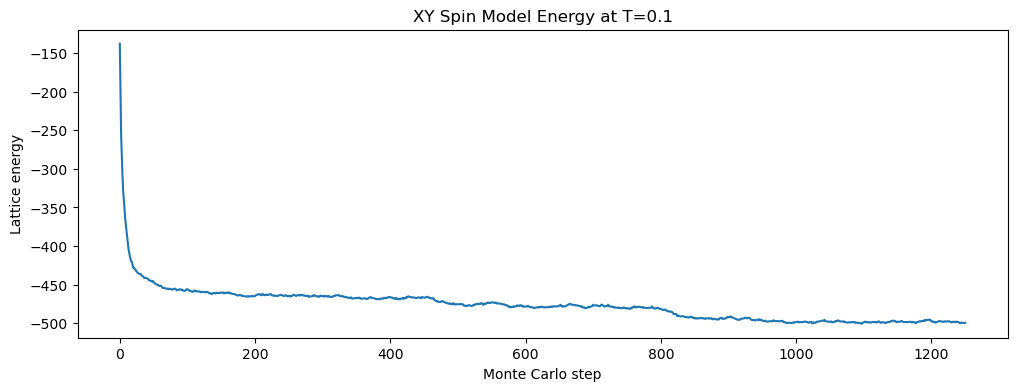

IndexError: index 5 is out of bounds for axis 0 with size 5

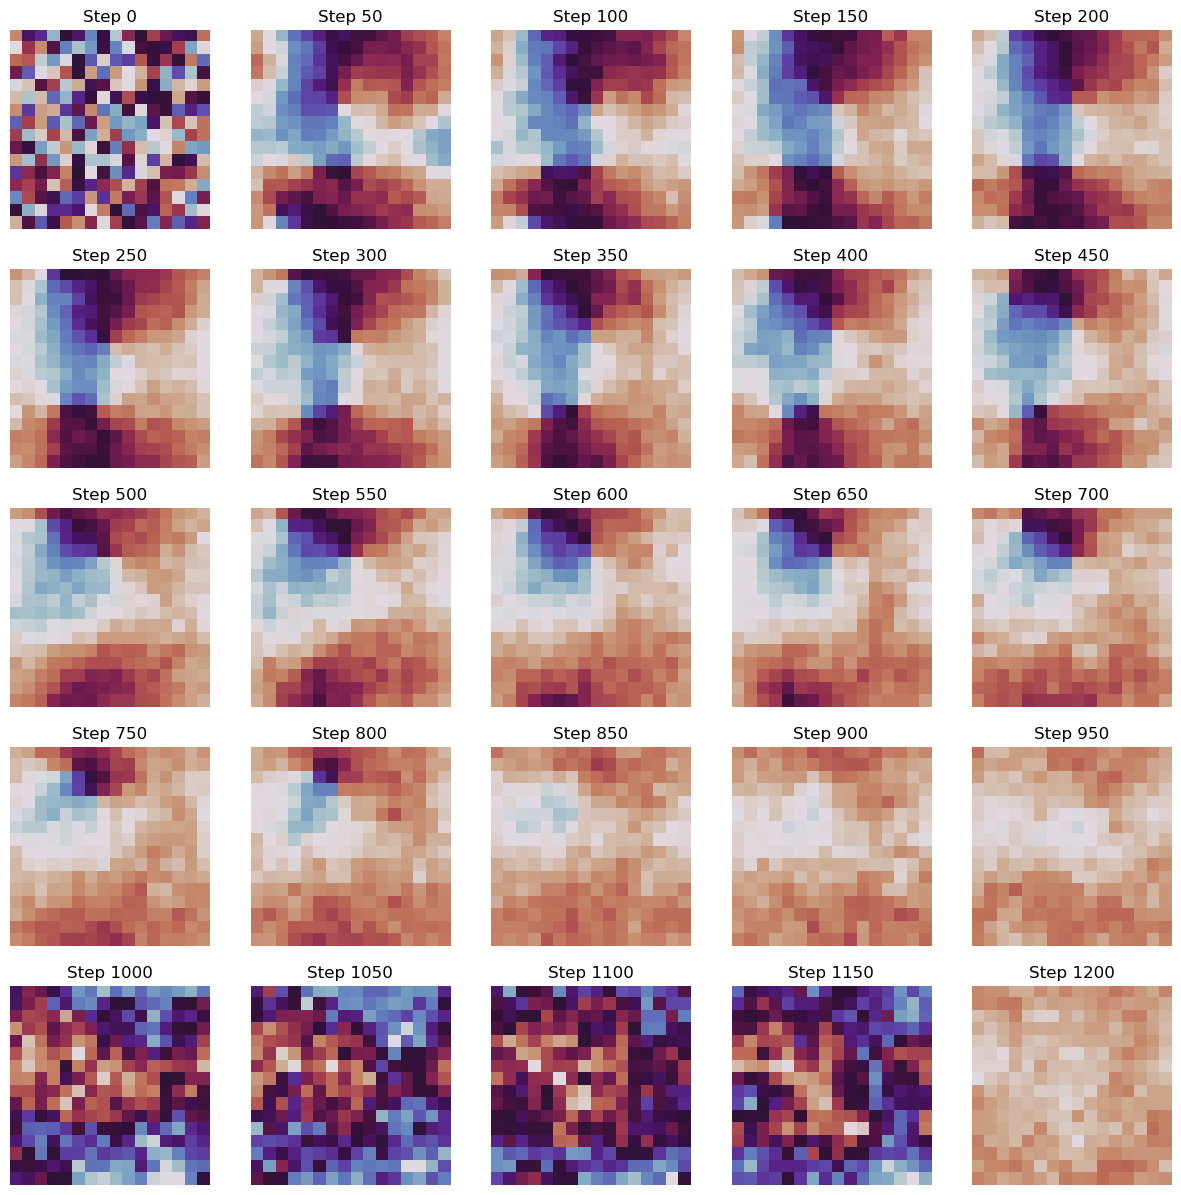

In [22]:
L = 16
T = 0.1
n_steps = 1250
snapshot_interval = 50

snapshots, energies = run_simulation_with_snapshots(L, T, n_steps, snapshot_interval=snapshot_interval)
plot_lattice_snapshots(snapshots, T, f"Evolution of XY Model (T={T})", snapshot_interval)

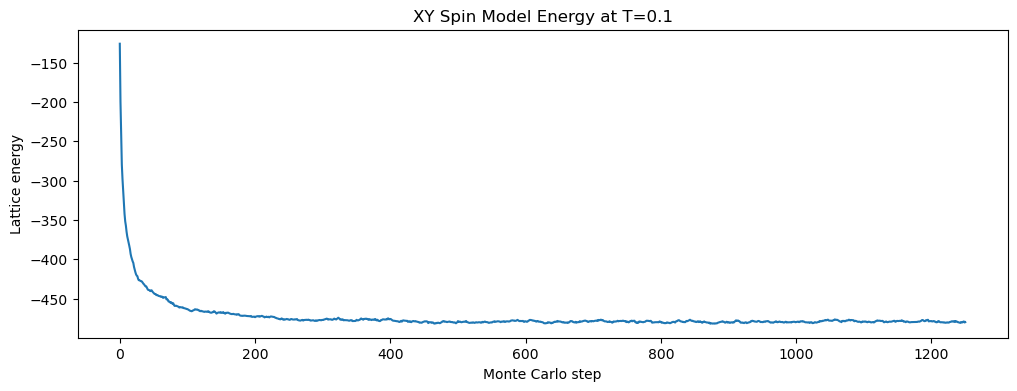

IndexError: index 5 is out of bounds for axis 0 with size 5

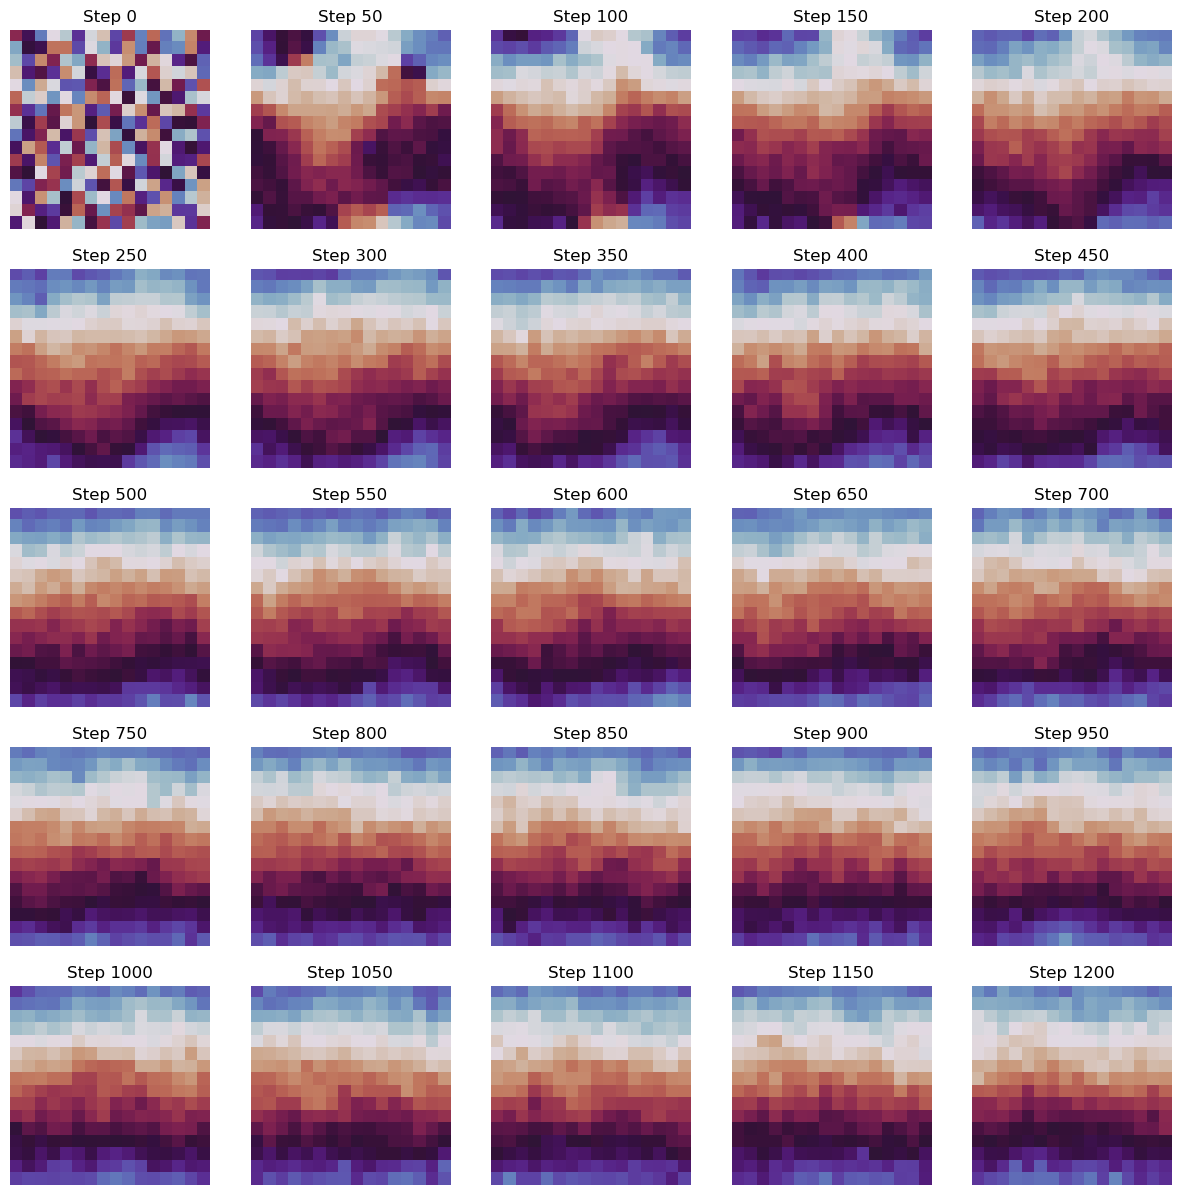

In [25]:
L = 16
T = 0.1
n_steps = 1250
snapshot_interval = 50

snapshots, energies = run_simulation_with_snapshots(L, T, n_steps, snapshot_interval=snapshot_interval)
plot_lattice_snapshots(snapshots, T, f"Evolution of XY Model (T={T})", snapshot_interval)

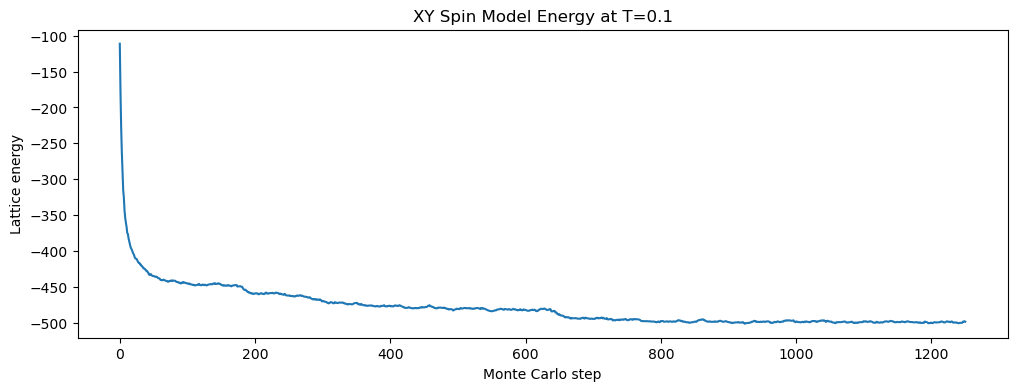

IndexError: index 5 is out of bounds for axis 0 with size 5

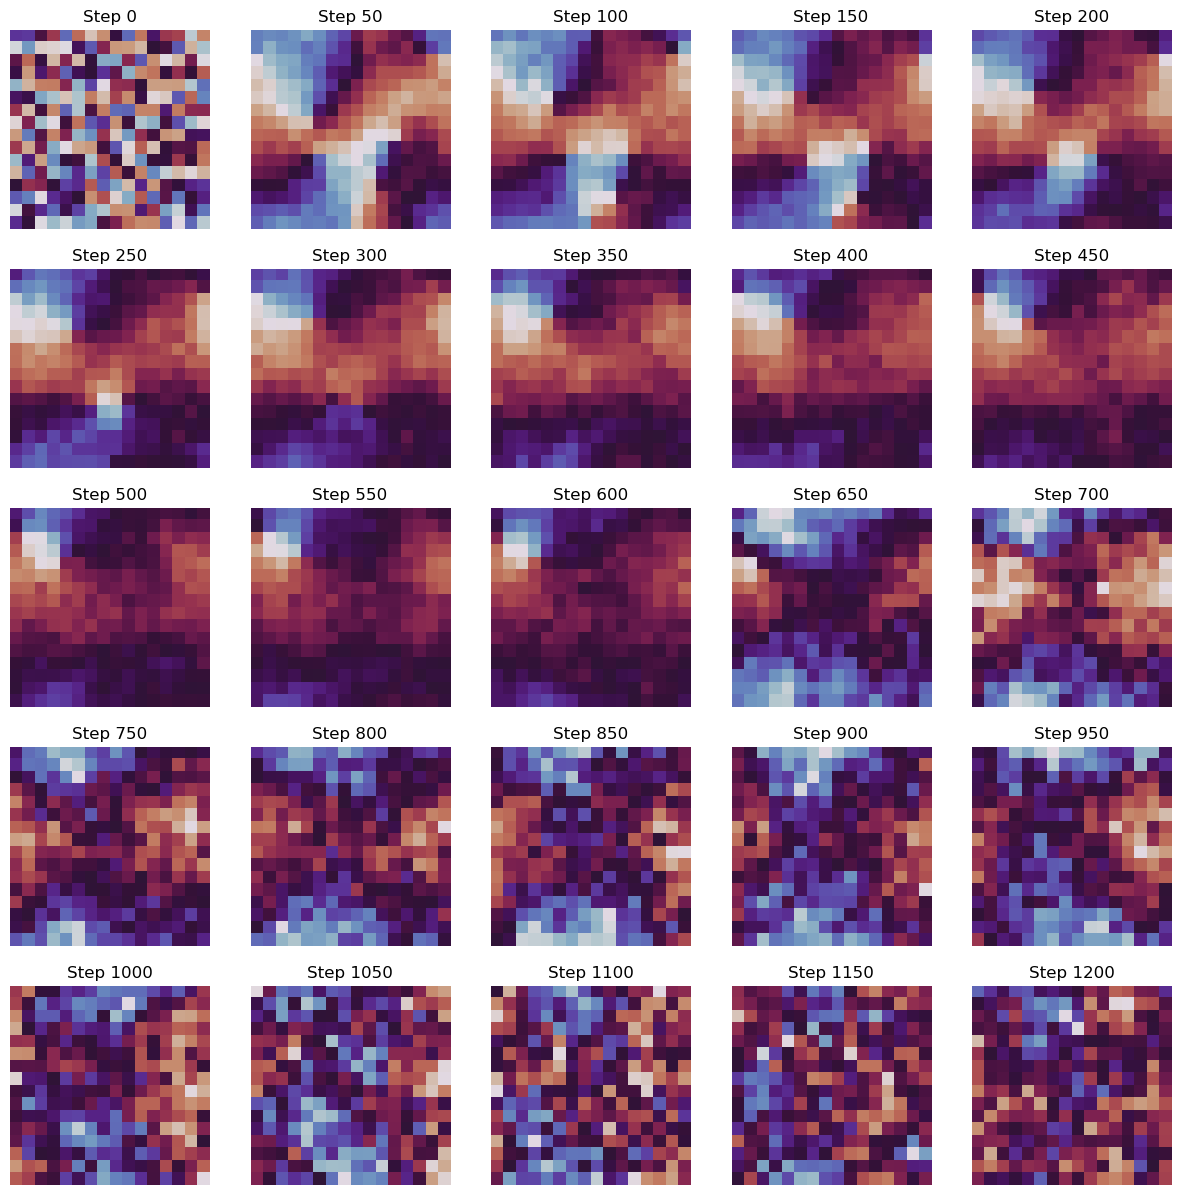

In [26]:
L = 16
T = 0.1
n_steps = 1250
snapshot_interval = 50

snapshots, energies = run_simulation_with_snapshots(L, T, n_steps, snapshot_interval=snapshot_interval)
plot_lattice_snapshots(snapshots, T, f"Evolution of XY Model (T={T})", snapshot_interval)